# **ML - Housing Price Prediction - Parthib**

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import scatter_matrix

#scikit-learn libraries to train model

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics





In [ ]:
#read housing csv file
housing_df = pd.read_csv('housing.csv')

## **Exploratory Data Analysis (EDA)**

In [ ]:
#view first 5 records
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
# view info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# describe
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


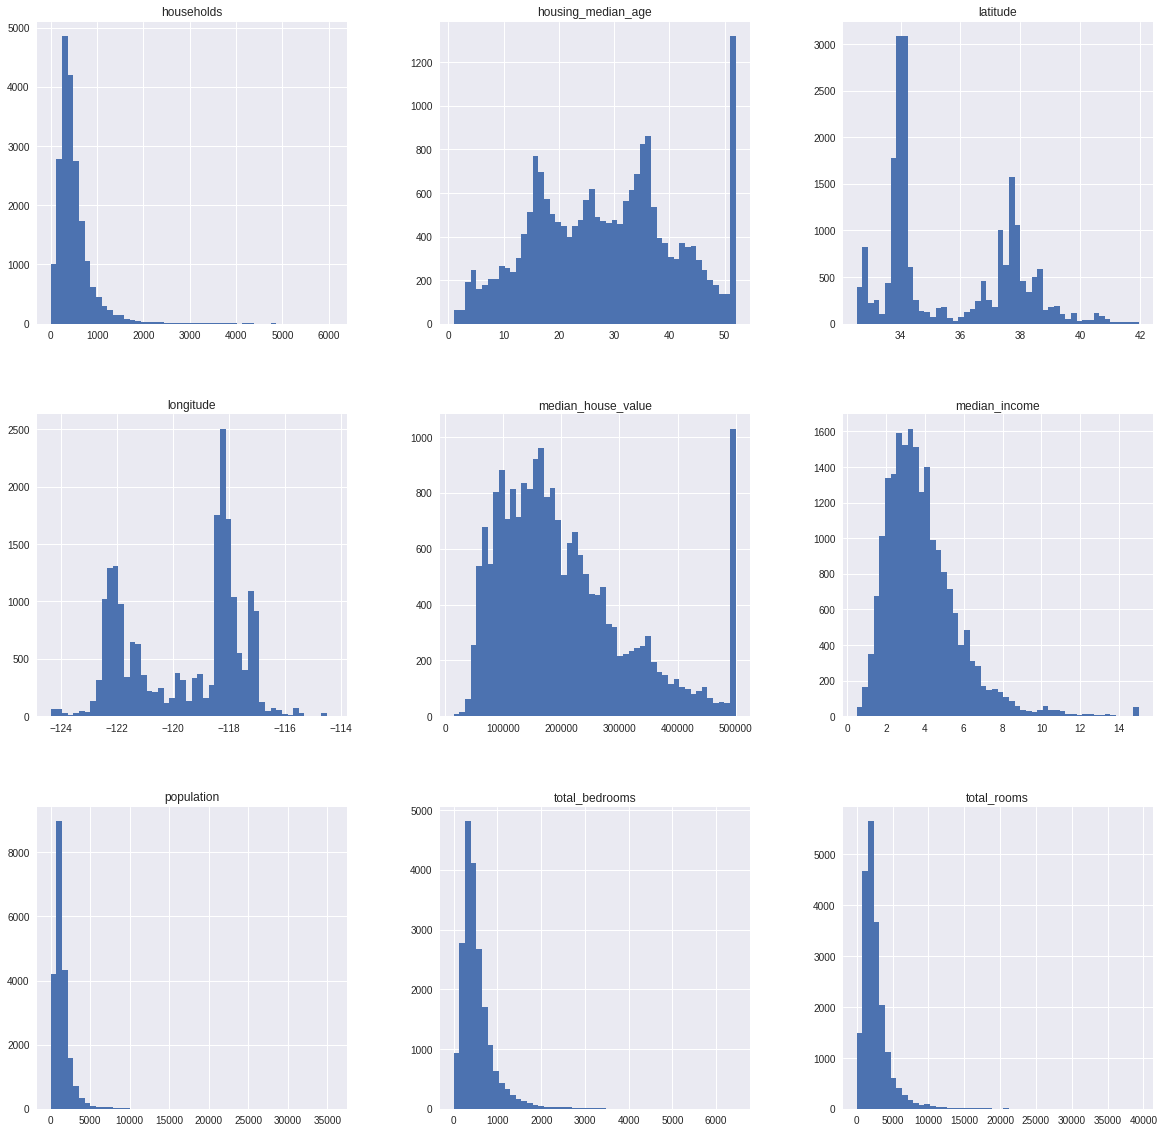

In [ ]:
#plot the histogram:
housing_df.hist(bins=50,figsize=(20,20))
plt.show()

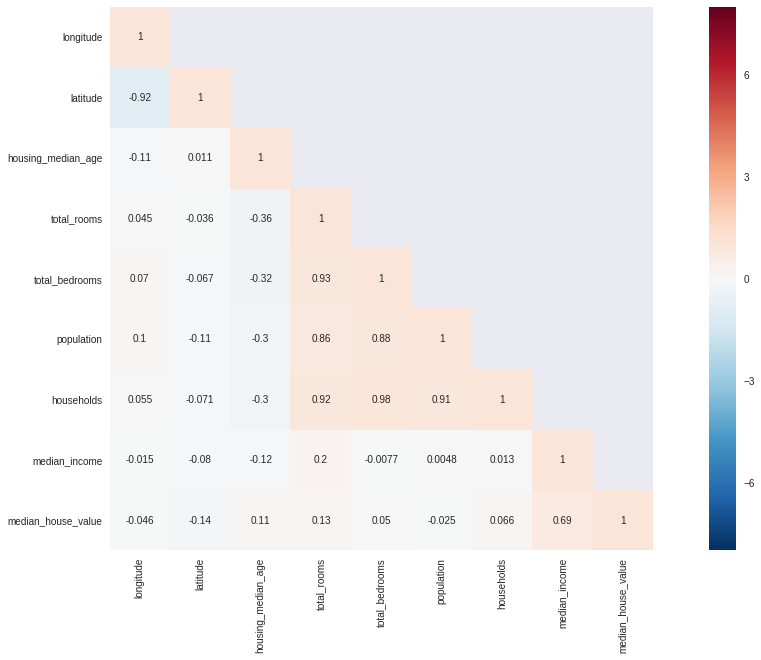

In [ ]:
# correlation analysis
corrmatrix=housing_df.corr()
mask = np.array(corrmatrix)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmatrix,mask=mask,vmax=8,square=True,annot=True)

## We can see from above heatmap, features total_bedrooms,population,households are highly corelated in predicting house prices.

In [ ]:
#view the shape
housing_df.shape

(20640, 10)

In [ ]:
#size
housing_df.size

206400

## **Handle missing values**

In [ ]:
#check for null values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
#describe 
housing_df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
#to fill the missing values, lets use mean gain with below command
#housing_df['total_bedrooms'].mean()

In [ ]:
#print(housing_df.iloc[:,4:5].head())
imputer_missing = Imputer(np.nan,strategy ="mean")
imputer_missing.fit(housing_df.iloc[:,4:5])
housing_df.iloc[:,4:5] = imputer_missing.transform(housing_df.iloc[:,4:5])
housing_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## **Encode categorical data**

In [ ]:
# ocean_proximity is categorical , lets EDA on it
housing_df['ocean_proximity'].head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [ ]:
housing_df['ocean_proximity'].tail(10)

20630    INLAND
20631    INLAND
20632    INLAND
20633    INLAND
20634    INLAND
20635    INLAND
20636    INLAND
20637    INLAND
20638    INLAND
20639    INLAND
Name: ocean_proximity, dtype: object

In [ ]:
#find unique values
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# value counts unique entries
housing_df['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#label encode ocean_proximity
labelEncoder = LabelEncoder()
housing_df['ocean_proximity'] = labelEncoder.fit_transform(housing_df["ocean_proximity"])
housing_df['ocean_proximity'].value_counts()
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


## **Split the dataset**

In [ ]:
X= housing_df.drop('median_house_value',axis=1)
print(X.head())
y = housing_df['median_house_value']
print("Medain Housing Values")
print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3  
Medain Housing Values
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train shape {} and size {}'.format(X_train.shape,X_train.size))
print('X_test shape {} and size {}'.format(X_test.shape,X_test.size))
print('y_train shape {} and size {}'.format(y_train.shape,y_train.size))
print('y_test shape {} and size {}'.format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


## **Standardize data**

In [ ]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

## **Perform Linear Regression**

In [ ]:
#instantiate the linear regression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print the intercept and coefficients 
print('Intercept is     '+str(linreg.intercept_))
print('coefficients  is '+str(linreg.coef_))

Intercept is     207194.6937378876
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [ ]:
#predict on the test data
y_pred = linreg.predict(X_test)

In [ ]:
#MSE for test data
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#MSE for training data
print(np.sqrt(metrics.mean_squared_error(y_train,linreg.predict(X_train))))

71098.69982050033
69361.0714290645


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


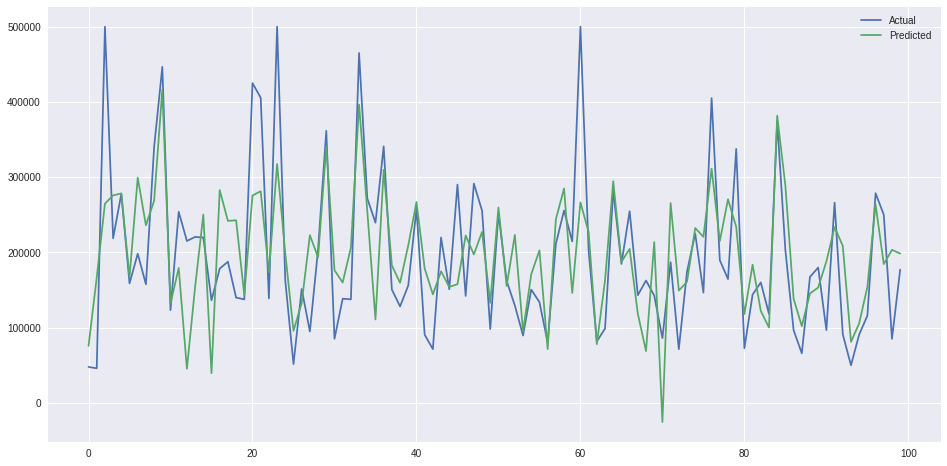

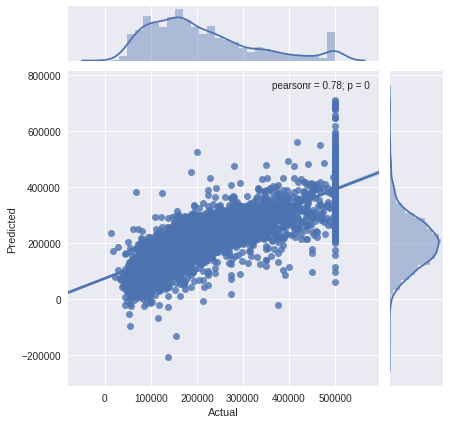

In [ ]:
#plot the graph
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

## **Perform Decision Tree Regression**

In [ ]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

In [ ]:
#MSE
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

60911.39448721503


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


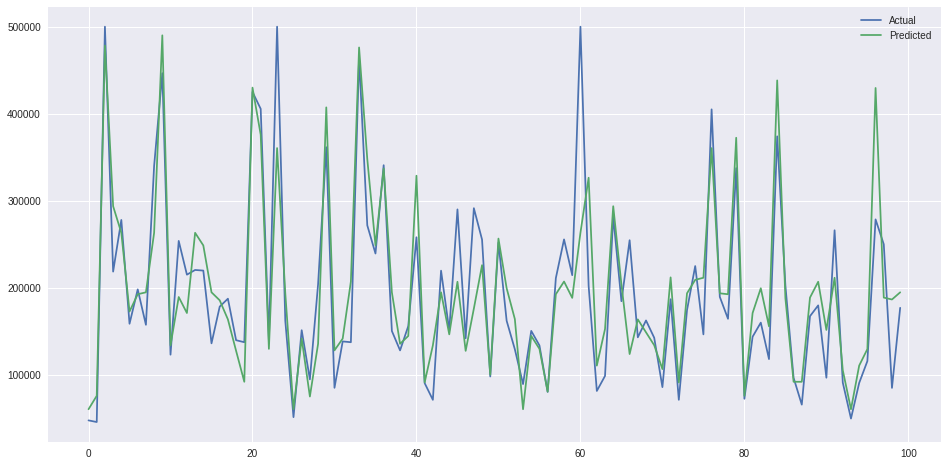

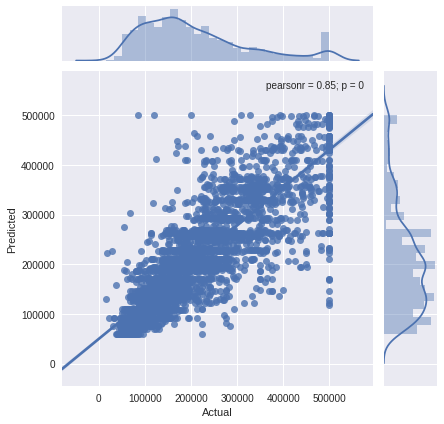

In [ ]:
#plot the graph
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

## **Perform Random Forest Regression**

In [ ]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
rfReg_y_pred = rfReg.predict(X_test)
rfReg_y_pred

array([ 59293.33333333,  63513.33333333, 466183.76666667, ...,
       500001.        ,  70200.        , 171146.66666667])

In [ ]:
#print MSE
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

50322.77039947742


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


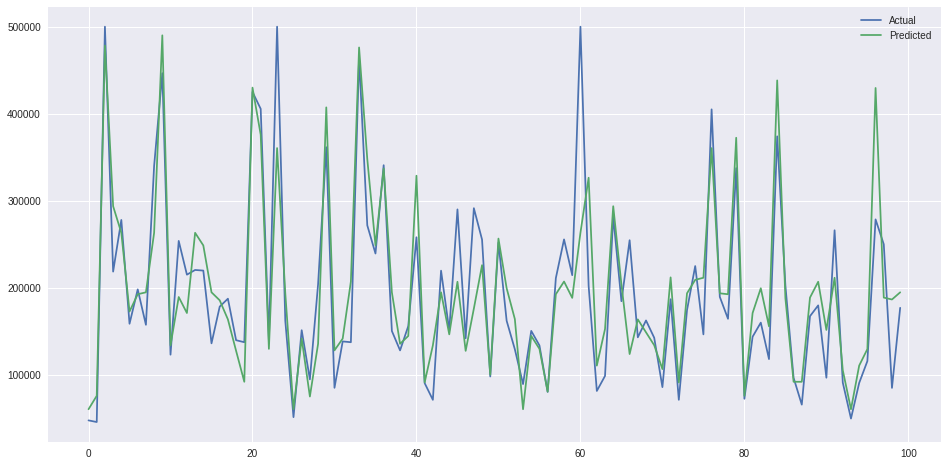

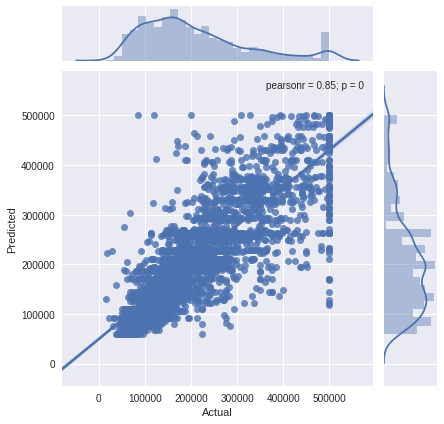

In [ ]:
# print the graph
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

## **Bonus exercise:**
## **Perform Linear Regression with one independent variable**
Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [ ]:
#Extract median_income 
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
housing_med = X.drop(dropcol,axis=1)
housing_med.head()

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']


,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(housing_med,y,test_size=0.2,random_state=42)
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (16512, 1) and size 16512
X_test2 shape (4128, 1) and size 4128
y_train2 shape (16512,) and size 16512
y_test2 shape (4128,) and size 4128


In [ ]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_pred2 = linReg2.predict(X_test2)
y_pred2

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

Text(0, 0.5, ' Predicted median_house_value')

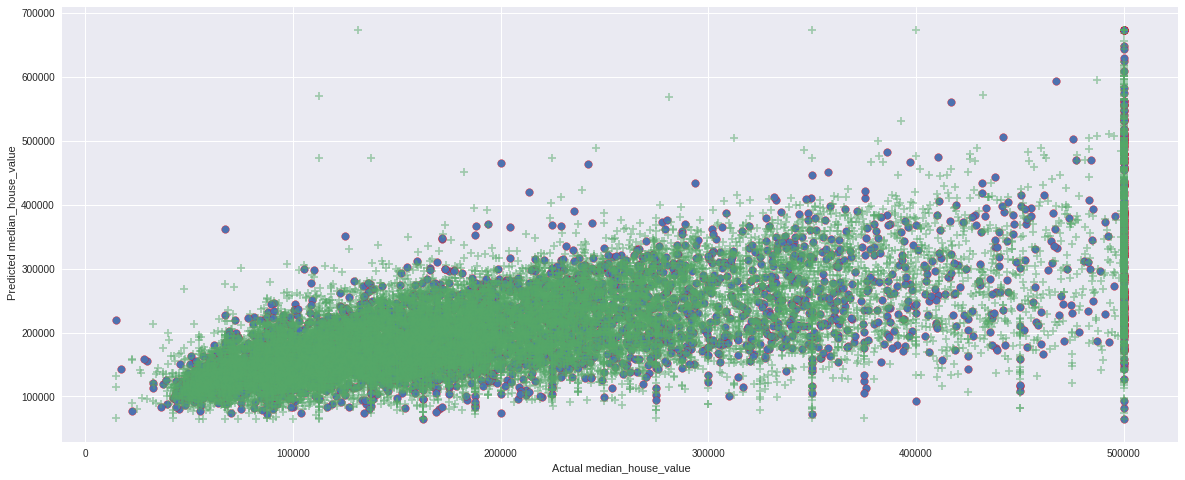

In [ ]:
#plot the graph
fig = plt.figure(figsize=(20,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linReg2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# **Summary**

    1. Data is not balanced (median_house_value, total_rooms and total_bedrooms max value is highly skewed from the spread) 

    2. From the heatmap, features total_bedrooms,population,households are highly corelated in predicting house prices. Hence other features can be ignored or we can feature engineering to combine together so that we can reduce RMSE.

    3.Out of all the 3 regression algorithms, Random Forest did better.